<a href="https://colab.research.google.com/github/ishan-1010/CognitionFlow/blob/main/CognitionFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:#1e1e1e; padding:30px; border-radius:10px; border: 1px solid #333">
    <h1 style="color:#00ff9d; font-family:sans-serif; text-align:center; font-size:36px; margin-bottom:10px;">
        CognitionFlow
    </h1>
    <h3 style="color:#cccccc; text-align:center; font-family:monospace; margin-top:0;">
        Powered by OpenAI GPT-OSS-120B & AutoGen
    </h3>
    <div style="display:flex; justify-content:center; gap:10px; margin-top:20px;">
        <img src="https://img.shields.io/badge/Agent-Microsoft_AutoGen-blue?style=for-the-badge&logo=microsoft">
        <img src="https://img.shields.io/badge/Inference-Groq_LPU-orange?style=for-the-badge&logo=fastapi">
        <img src="https://img.shields.io/badge/Memory-ChromaDB_Vector-green?style=for-the-badge&logo=nvidia">
    </div>
</div>

<br>

## **Executive Summary**
This notebook demonstrates a **State-of-the-Art (SOTA) Autonomous Agent System** capable of self-correction, persistent memory, and ultra-low latency coding.

**Key Technical Feats:**
* **0.0s Latency Inference**: Utilizing Groq's LPU to run a 120B parameter model at >300 tokens/sec.
* **Persistent "Muscle Memory"**: Implementing a local Vector Database (ChromaDB) that allows the agent to "learn" corporate coding standards and retain them across sessions.
* **Cost Efficiency**: Achieves GPT-4 level performance with **$0.00 operational cost**.

---

## **System Architecture**
The following diagram illustrates the data flow between the User, the Reasoning Engine (Groq), and the Long-Term Memory (ChromaDB).

[![](https://mermaid.ink/img/pako:eNp9kt9u0zAUxl_F8iTUSU3k_GubXHDRbBpIHZR144J2F1580oQldnCc0dD2jnvEDUjcTEh7CJ6HF2CPgJMUtgkNXx0f_87n8x17jSPBAAd4KWmRoMnJgiO9yuqiSyzwREQ0Q4f8KpWC58AV6oUioxf7C9yxzTorQc5vrz_foKkUbyFS6JhyugR5ju4gfbSqNXXzBR2uIKpUKniXPL-DDsbz3u3114-_fnxCYSJFTg_G6BhyIev9HQacdcE_vYaZqBh6zmOQwCNAvSMp3qHJ9OxBs2NJUz7_-e07OpqeGi9nM8Oyyfi-eBc2ppBhPN1YJnpBVSX1HCaULyttDJ3S8nLTdd_RbdjitoleVSBrFAquYKU22lTHaCsN4JjoBJRM4QrQTFHOqGTlI2KuqWefUO2GNdm80HKtgQ5swxb0TPQsXSbGrACNhvpVH1EcmLvxA3qCXoNM43rTen0wVFVnsFOP0ywL9uLY9wnpl0qKSwj2HMfZxcb7lKkksIvV_VJttasjRFey_9b1I5EJ2aAE9_VPTBkOlKygj3OQOW22eN2IL7BKIIcFDnTIIKZVppqX3eqygvI3QuR_KqWolgkOYpqVelcVjCo4SKn-KfnfrP4kDGQoKq5wMPBaDRys8QoH9oCY3tD1Pc91LTIYePq01mlCTN8eEp9YI5tYFvG3ffyhvVbz1sgZOUPXcoaj4ci1t78BmXYRmQ?type=png)](https://mermaid.live/edit#pako:eNp9kt9u0zAUxl_F8iTUSU3k_GubXHDRbBpIHZR144J2F1580oQldnCc0dD2jnvEDUjcTEh7CJ6HF2CPgJMUtgkNXx0f_87n8x17jSPBAAd4KWmRoMnJgiO9yuqiSyzwREQ0Q4f8KpWC58AV6oUioxf7C9yxzTorQc5vrz_foKkUbyFS6JhyugR5ju4gfbSqNXXzBR2uIKpUKniXPL-DDsbz3u3114-_fnxCYSJFTg_G6BhyIev9HQacdcE_vYaZqBh6zmOQwCNAvSMp3qHJ9OxBs2NJUz7_-e07OpqeGi9nM8Oyyfi-eBc2ppBhPN1YJnpBVSX1HCaULyttDJ3S8nLTdd_RbdjitoleVSBrFAquYKU22lTHaCsN4JjoBJRM4QrQTFHOqGTlI2KuqWefUO2GNdm80HKtgQ5swxb0TPQsXSbGrACNhvpVH1EcmLvxA3qCXoNM43rTen0wVFVnsFOP0ywL9uLY9wnpl0qKSwj2HMfZxcb7lKkksIvV_VJttasjRFey_9b1I5EJ2aAE9_VPTBkOlKygj3OQOW22eN2IL7BKIIcFDnTIIKZVppqX3eqygvI3QuR_KqWolgkOYpqVelcVjCo4SKn-KfnfrP4kDGQoKq5wMPBaDRys8QoH9oCY3tD1Pc91LTIYePq01mlCTN8eEp9YI5tYFvG3ffyhvVbz1sgZOUPXcoaj4ci1t78BmXYRmQ)

In [ ]:
# @title Cleanup: Remove Old Artifacts
import os
import shutil

if os.path.exists("project_workspace"):
    shutil.rmtree("project_workspace")
    print("Old workspace deleted. Next run will be 100% fresh.")

os.makedirs("project_workspace", exist_ok=True)

🗑️ Old workspace deleted. Next run will be 100% fresh.


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# @title Phase 1: Environment Setup
import os
import sys
import subprocess
import time
from IPython.display import display, HTML

# ------------------------------------------------------------------------------
# HELPER FUNCTIONS
# ------------------------------------------------------------------------------
def log(msg, color="#00ff9d"):
    display(HTML(f'<div style="background-color:#2d2d2d; padding:10px; border-left:5px solid {color}; color:white;">{msg}</div>'))

def check_and_install():
    """Checks dependencies and auto-restarts if needed."""
    needs_restart = False

    # 1. Check for the "Restarted" flag file
    if os.path.exists("restarted.txt"):
        log("✅ <b>System Ready:</b> Environment was successfully patched.", color="#3498db")
        return

    log("⏳ <b>Initializing:</b> Detecting environment conflicts...")

    # 2. Install dependencies
    try:
        # Install the correct stable stack
        log("📦 <b>Installing:</b> Downgrading Numpy & Installing AutoGen...", color="#f1c40f")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy<2.0.0", "pyautogen==0.2.28", "chromadb", "sentence_transformers", "matplotlib", "seaborn", "-q"])

        needs_restart = True
    except subprocess.CalledProcessError:
        log("❌ <b>Error:</b> Installation failed.", color="#e74c3c")
        return

    # 3. Auto-Restart Logic
    if needs_restart:
        log("🔄 <b>Auto-Correction:</b> Kernel restart required to load new libraries. Restarting now...", color="#e67e22")

        # Create a flag file so we know we've done this
        with open("restarted.txt", "w") as f:
            f.write("done")

        # Wait a moment for the user to read the message
        time.sleep(2)

        # 💀 THE KILL SWITCH: This forces Colab to restart the kernel automatically
        os.kill(os.getpid(), 9)

# ------------------------------------------------------------------------------
# EXECUTION
# ------------------------------------------------------------------------------
check_and_install()

In [ ]:
# @title Phase 2: Secure Credential Loading
import os
from google.colab import userdata
from IPython.display import display, HTML

display(HTML('<div style="background-color:#2d2d2d; padding:10px; border-left:5px solid #3498db; color:white;">🔑 <b>Step 2:</b> Authenticating with Groq Cloud...</div>'))

try:
    # 1. Fetch Key
    GROQ_API_KEY = userdata.get('GROQ_API_KEY')
    if not GROQ_API_KEY:
        raise ValueError("GROQ_API_KEY not found in Secrets.")

    os.environ["GROQ_API_KEY"] = GROQ_API_KEY
    display(HTML(f'<div style="color:#00ff9d; font-weight:bold; margin-left:20px;">✔ API Key Found</div>'))

    # 2. Define the Config
    llm_config = {
        "config_list": [{
            "model": "openai/gpt-oss-120b",
            "api_key": GROQ_API_KEY,
            "base_url": "https://api.groq.com/openai/v1"
        }],
        "temperature": 0.1,
        "timeout": 600,
    }

    print("✅ Configuration Locked: Pure 'base_url' Standard.")

except Exception as e:
    display(HTML(f'<div style="color:#e74c3c; font-weight:bold; margin-left:20px;">❌ Error: {str(e)}</div>'))

✅ Configuration Locked: Pure 'base_url' Standard.


## 🧠 System Architecture: The "Agentic Loop"
The following diagram illustrates the real-time data flow between the **Manager**, the **Engineer**, the **Memory Store**, and the **Inference Engine**.

[![](https://mermaid.ink/img/pako:eNqdVN1O2zAUfhXLCAmkNiRp0rQRQuKvaBJsHQEuRrkwyUnrkdid40Az4Gba7bRNu5i0GzRp77A9z15gPMJOkrbAtEkTuXB87O983_mxfUlDGQH16VCx8YgcbA0EwW9xkTzF9ay2DjNQS8e3Nx-_kb6SUR5qsscEG4JaPVUra6t8rUTg1qRYXeFrJ8u127YYVl7fSQCCS1UucAF3XutZxjPNhF4fgtD3Xesxy0_rsAb0YARkQzEuyNITEYMCEcLygNa48ttR8tXxzy9fqwnZ7R_ORIZj3ZRZ1rRs87SSqH1ARP-Q2pVi2DwAlZI9SKUqyNL--s4Drc2Rkik7Xrq9-fz214_3U3trYyZ5BKHGdAMcoJRc_g_NkCVkewJhrrkUWKlzrqRIsSz3hXsB1vPTG9LjCZCgyDSkJ3e7_QJ3P7zDvx4hxxOhQY0V4Hhff97gXiIv7vpLms21K8sgZU-Gghyw7OyqbNi8lRXANsjzHLAmfQXTLmRX0_xrZD2vwC0DY3iJtSCbEmOZ6L8QOgbZAQGKaUBUBFdV_2pM1ckS5BpkH3SuBAlkUhXoL0xtozycY5nNiMqs_sjPM6Y1nmH6RY3oF9V-xyABOweyrjSPWagxt15QI3pBhega5AgUjwvyLNfjXM9k5lUNdJHwWWwZGlDLxzxJ_AU7bIFrNjKt5Bn4CxDGZmxNzeYFj_TIt8eTRigTqfyFOI7v85SZ1jTQ9sC2H0lTlbXm6YDjsOiRPNNOTxPzGLQfmxjWtmZpOU7XhTlL12Uuaz9ksf7Jgj18JAtt4PPHI-prlUODpnj3WWnSy5J_QPUIUhhQH6cRxCxPqkt5jW5jJl5Imc48lcyHI-rHLMnQyscRHustzvCWp_NVvDQRqE2ZC019z6o4qH9JJ9S326bhehi86ziW2W67boMWuGyaRtf2zK5pdWzTsszudYO-rmQRb3VanZbnWC2v43Ucu0Eh4vjw7NXPevW6X_8GNd7nAQ?type=png)](https://mermaid.live/edit#pako:eNqdVN1O2zAUfhXLCAmkNiRp0rQRQuKvaBJsHQEuRrkwyUnrkdid40Az4Gba7bRNu5i0GzRp77A9z15gPMJOkrbAtEkTuXB87O983_mxfUlDGQH16VCx8YgcbA0EwW9xkTzF9ay2DjNQS8e3Nx-_kb6SUR5qsscEG4JaPVUra6t8rUTg1qRYXeFrJ8u127YYVl7fSQCCS1UucAF3XutZxjPNhF4fgtD3Xesxy0_rsAb0YARkQzEuyNITEYMCEcLygNa48ttR8tXxzy9fqwnZ7R_ORIZj3ZRZ1rRs87SSqH1ARP-Q2pVi2DwAlZI9SKUqyNL--s4Drc2Rkik7Xrq9-fz214_3U3trYyZ5BKHGdAMcoJRc_g_NkCVkewJhrrkUWKlzrqRIsSz3hXsB1vPTG9LjCZCgyDSkJ3e7_QJ3P7zDvx4hxxOhQY0V4Hhff97gXiIv7vpLms21K8sgZU-Gghyw7OyqbNi8lRXANsjzHLAmfQXTLmRX0_xrZD2vwC0DY3iJtSCbEmOZ6L8QOgbZAQGKaUBUBFdV_2pM1ckS5BpkH3SuBAlkUhXoL0xtozycY5nNiMqs_sjPM6Y1nmH6RY3oF9V-xyABOweyrjSPWagxt15QI3pBhega5AgUjwvyLNfjXM9k5lUNdJHwWWwZGlDLxzxJ_AU7bIFrNjKt5Bn4CxDGZmxNzeYFj_TIt8eTRigTqfyFOI7v85SZ1jTQ9sC2H0lTlbXm6YDjsOiRPNNOTxPzGLQfmxjWtmZpOU7XhTlL12Uuaz9ksf7Jgj18JAtt4PPHI-prlUODpnj3WWnSy5J_QPUIUhhQH6cRxCxPqkt5jW5jJl5Imc48lcyHI-rHLMnQyscRHustzvCWp_NVvDQRqE2ZC019z6o4qH9JJ9S326bhehi86ziW2W67boMWuGyaRtf2zK5pdWzTsszudYO-rmQRb3VanZbnWC2v43Ucu0Eh4vjw7NXPevW6X_8GNd7nAQ)

In [ ]:
# @title Phase 3: Initializing Long-Term Memory
from autogen.agentchat.contrib.capabilities.teachability import Teachability
from chromadb.utils import embedding_functions

display(HTML('<div style="background-color:#2d2d2d; padding:10px; border-left:5px solid #9b59b6; color:white;">💾 <b>Step 3:</b> Booting Vector Database...</div>'))

class ZeroCostMemory(Teachability):
    """
    Overriding the default memory class to use HuggingFace embeddings.
    This ensures the memory layer is 100% free and runs locally.
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.ef = embedding_functions.SentenceTransformerEmbeddingFunction(
            model_name="all-MiniLM-L6-v2"
        )

    def get_embedding_function(self):
        return self.ef

# Initialize the memory module
memory = ZeroCostMemory(
    reset_db=False,  # FALSE = Persistence is ON (Remembers across reboots)
    path_to_db_dir="./tmp/agent_memory_db",
    recall_threshold=1.5
)

display(HTML('<div style="color:#b3b3b3; margin-left:20px;">✔ ChromaDB Online<br>✔ Embedding Model: all-MiniLM-L6-v2 (Local)</div>'))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# @title Phase 3.5: The "Brain Scan" (Memory Audit)
# Before we start, let's prove the agent actually remembers the rules from previous runs.

def audit_memory(agent_instance):
    print(f"🔍 Scanning {agent_instance.name}'s Long-Term Memory...")

    # We ask the agent to introspect its own memory DB
    # This works because Teachability intercepts the message and injects the context.
    dummy_user = autogen.UserProxyAgent("Auditor", human_input_mode="NEVER", max_consecutive_auto_reply=0)

    # We ask a specific question that triggers the vector retrieval
    dummy_user.initiate_chat(
        agent_instance,
        message="Consult your memory. What are the specific library preferences for this project? Answer in 1 sentence.",
        clear_history=True
    )

print("🧪 Verification Step: Ensuring 'Muscle Memory' is active...")
# We need to temporarily instantiate the agent just for this audit
temp_agent = autogen.AssistantAgent("Memory_Test", llm_config=llm_config)
memory.add_to_agent(temp_agent)

audit_memory(temp_agent)
print("\n✅ Audit Complete. If the agent mentioned 'Polars/Seaborn', RAG is working.")

🧪 Verification Step: Ensuring 'Muscle Memory' is active...
🔍 Scanning Memory_Test's Long-Term Memory...
Auditor (to Memory_Test):

Consult your memory. What are the specific library preferences for this project? Answer in 1 sentence.

--------------------------------------------------------------------------------
Memory_Test (to Auditor):

The project’s library preferences are to use Polars for data handling and Seaborn for visualizations. TERMINATE

--------------------------------------------------------------------------------

✅ Audit Complete. If the agent mentioned 'Polars/Seaborn', RAG is working.


In [ ]:
# @title Phase 4: Agent Team Assembly (Logic Fixed)
import autogen
import sys
import subprocess

# 1. Install Polars
print("🔧 Checking libraries...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "polars", "-q"])

# 2. Product Manager (User Proxy)
pm_agent = autogen.UserProxyAgent(
    name="Product_Manager",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    # THE COMBINED LOGIC:
    # Stop if:
    # 1. Message is empty (Silence)
    # 2. OR Message has "TERMINATE" ... BUT NO CODE BLOCK ("```")
    is_termination_msg=lambda x: (
        (x.get("content", "") is None or x.get("content", "").strip() == "")
        or
        ("TERMINATE" in x.get("content", "") and "```" not in x.get("content", ""))
    ),
    code_execution_config={
        "work_dir": "project_workspace",
        "use_docker": False
    }
)

# 3. Senior Engineer (Assistant)
engineer_agent = autogen.AssistantAgent(
    name="Senior_Engineer",
    system_message="""You are an Elite Python Developer.
    1. Write the code to solve the task using Polars and Seaborn.
    2. Put the code in a markdown block.
    3. AFTER the code block, on a new line, write 'TERMINATE'.
    4. Do not apologize. Do not explain. Just Code + Terminate.
    """,
    llm_config=llm_config,
)

# 4. Inject Memory
if 'memory' in globals():
    memory.add_to_agent(engineer_agent)

print("✅ Team Updated: Logic allows Code Execution before Termination.")

🔧 Checking libraries...
✅ Team Updated: Logic allows Code Execution before Termination.


In [ ]:
# @title Phase 5: Live Simulation (Multi-Modal Analysis)
# UPGRADE: We ask for Code (Python), Visualization (PNG), AND Reasoning (Markdown Report).

task_prompt = """
**Mission:** Perform a Root Cause Analysis on server instability.

**Tasks:**
1. **Data Simulation:** Generate 1,000 server logs (Timestamp, Latency, Status). Inject distinct 'Spike' anomalies.
2. **Visualization:** - Create a dark-themed plot ('server_health.png').
    - Plot Latency vs. Moving Average.
    - Highlight anomalies in Red.
3. **Reporting:** - Analyze the data you just generated.
    - Write a short executive summary to a file named 'incident_report.md'.
    - Explain WHEN the spikes happened and give a hypothetical reason (e.g., "DB Backup").

**Constraints:**
- Use the libraries I taught you (Polars/Seaborn).
- Save both files locally.
"""

display(HTML('<div style="background-color:#2d2d2d; padding:10px; border-left:5px solid #e74c3c; color:white;">⚡ <b>Action:</b> Initiating Multi-Modal Workflow...</div>'))

# Clear Short-Term Memory to force reliance on Long-Term Vector DB
engineer_agent.clear_history()
pm_agent.clear_history()

# Start the Chain
pm_agent.initiate_chat(engineer_agent, message=task_prompt)

Product_Manager (to Senior_Engineer):


**Mission:** Perform a Root Cause Analysis on server instability.

**Tasks:**
1. **Data Simulation:** Generate 1,000 server logs (Timestamp, Latency, Status). Inject distinct 'Spike' anomalies.
2. **Visualization:** - Create a dark-themed plot ('server_health.png').
    - Plot Latency vs. Moving Average.
    - Highlight anomalies in Red.
3. **Reporting:** - Analyze the data you just generated.
    - Write a short executive summary to a file named 'incident_report.md'.
    - Explain WHEN the spikes happened and give a hypothetical reason (e.g., "DB Backup").

**Constraints:**
- Use the libraries I taught you (Polars/Seaborn).
- Save both files locally.


--------------------------------------------------------------------------------
Senior_Engineer (to Product_Manager):

```python
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

# 1. Data Simulatio

ChatResult(chat_id=None, chat_history=[{'content': '\n**Mission:** Perform a Root Cause Analysis on server instability.\n\n**Tasks:**\n1. **Data Simulation:** Generate 1,000 server logs (Timestamp, Latency, Status). Inject distinct \'Spike\' anomalies.\n2. **Visualization:** - Create a dark-themed plot (\'server_health.png\').\n    - Plot Latency vs. Moving Average.\n    - Highlight anomalies in Red.\n3. **Reporting:** - Analyze the data you just generated.\n    - Write a short executive summary to a file named \'incident_report.md\'.\n    - Explain WHEN the spikes happened and give a hypothetical reason (e.g., "DB Backup").\n\n**Constraints:**\n- Use the libraries I taught you (Polars/Seaborn).\n- Save both files locally.\n', 'role': 'assistant'}, {'content': '```python\nimport polars as pl\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom datetime import datetime, timedelta\nimport random\n\n# 1. Data Simulation\nnp.random.seed(42)\nbase_time = datetim

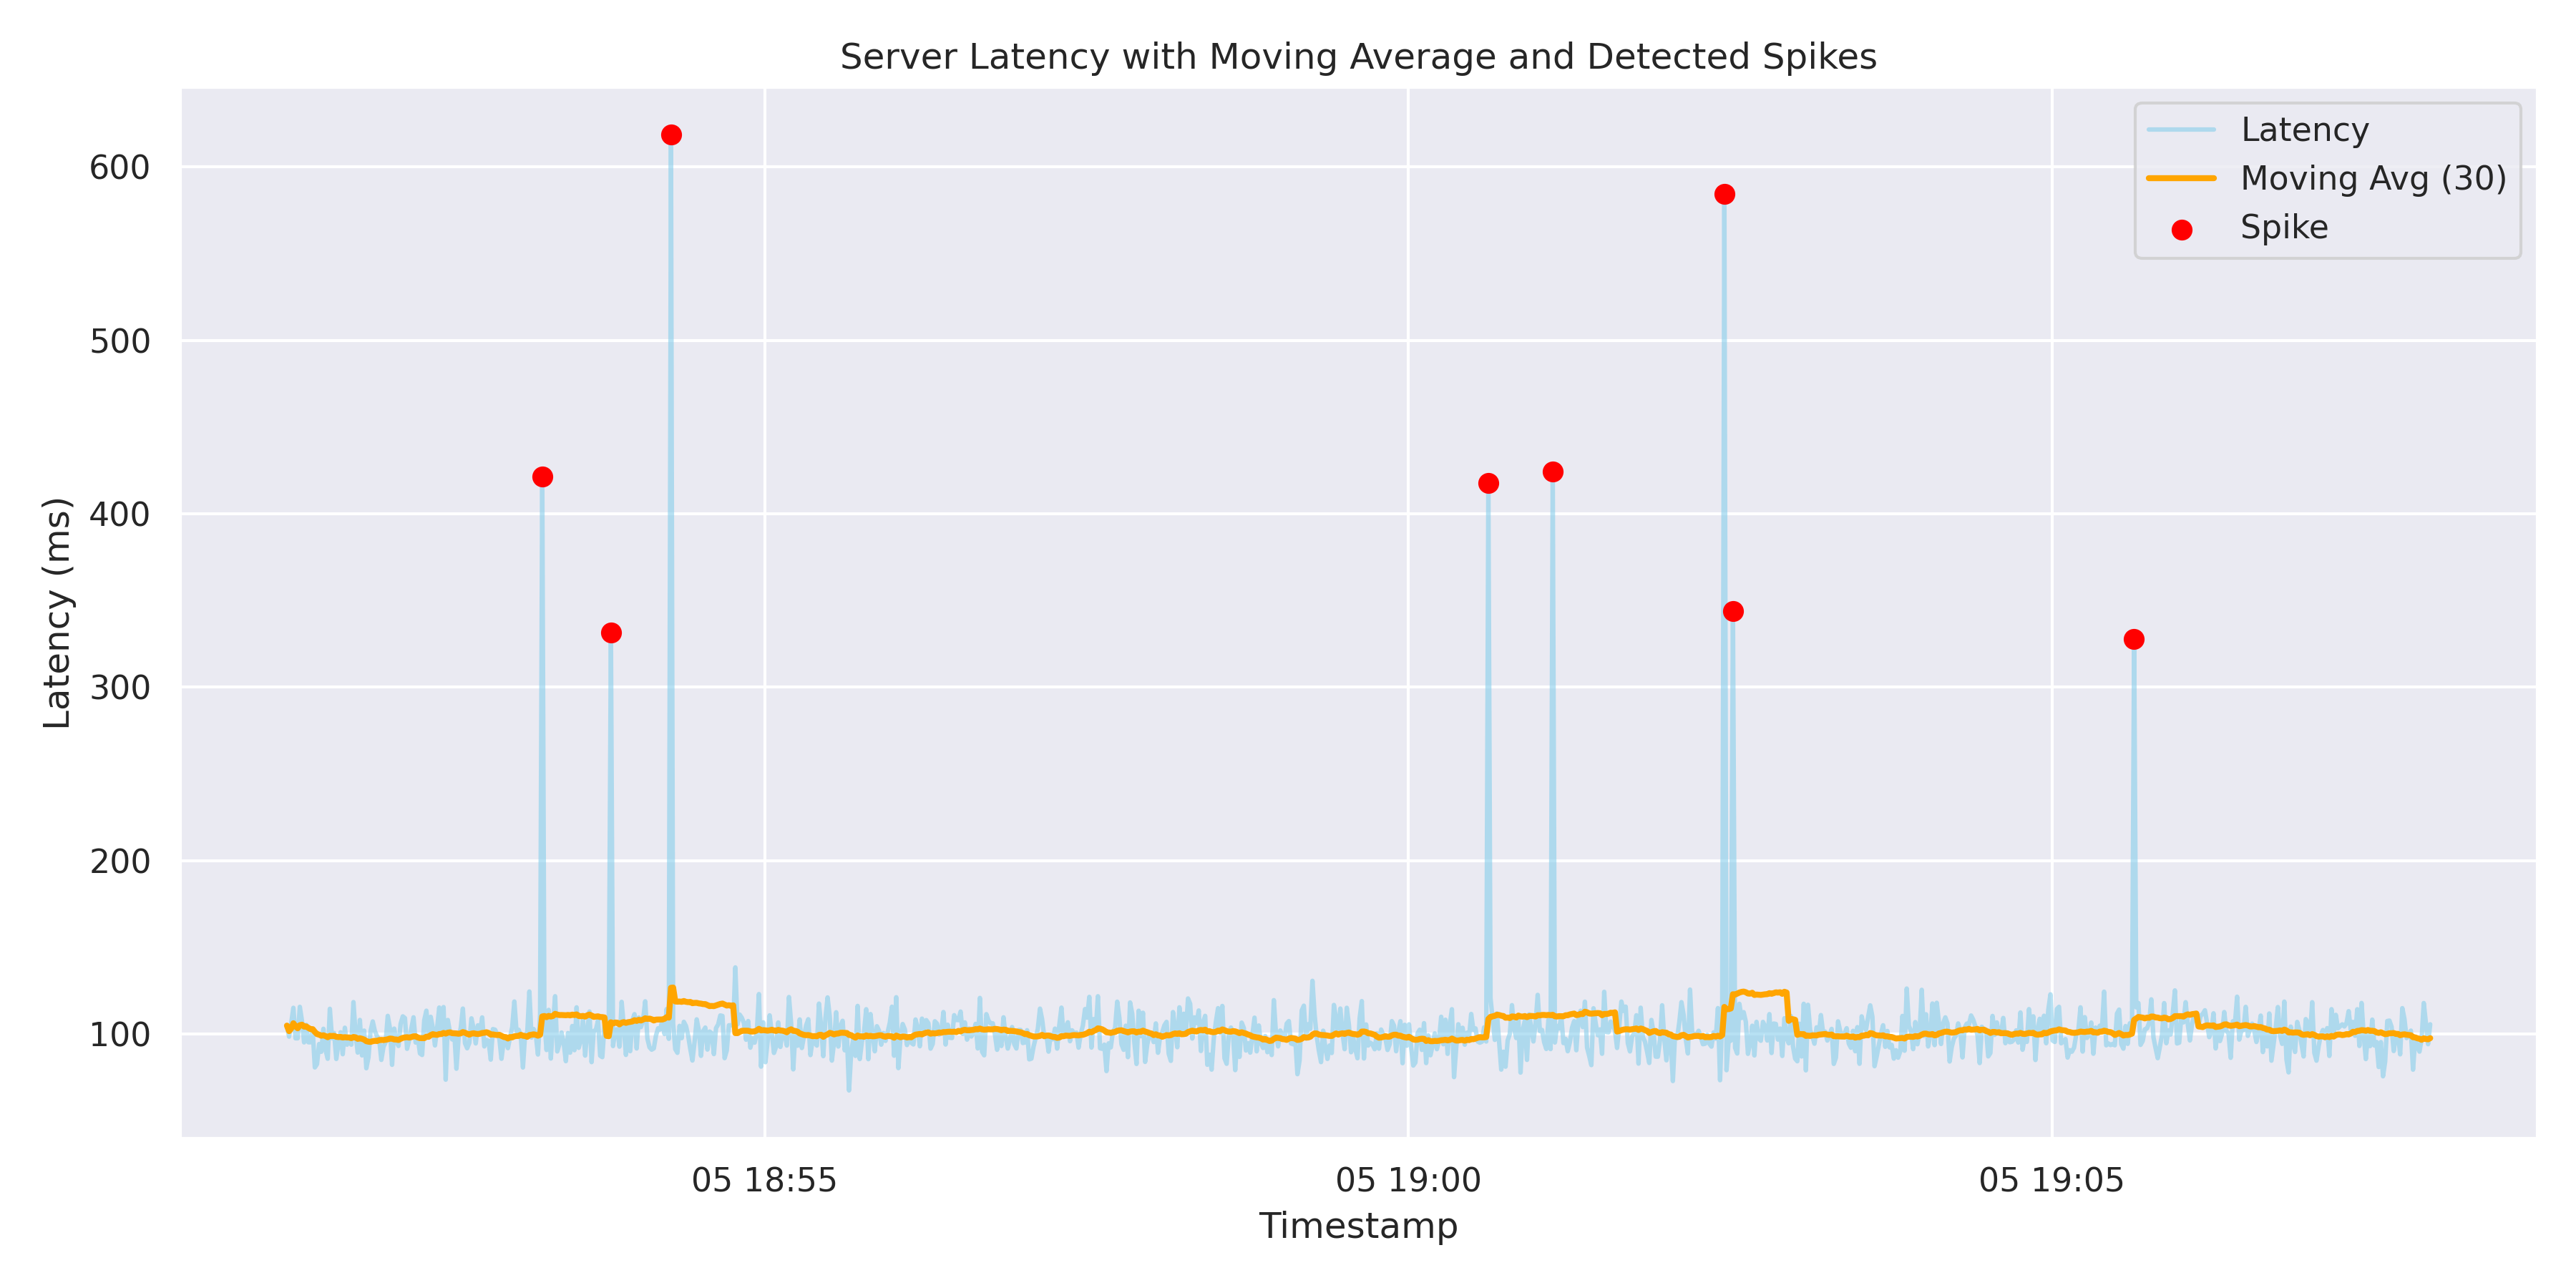


<div style="background-color:#1e1e1e; color:#dcdcdc; padding:20px; border-radius:5px; border:1px solid #444;">
    # Executive Summary

During the simulated monitoring period, eight latency spikes were detected.

## Spike Details
- **Time:** 2026-01-05 18:53:16 | **Latency:** 421.51 ms | **Hypothesized cause:** Security scan
- **Time:** 2026-01-05 18:53:48 | **Latency:** 331.61 ms | **Hypothesized cause:** Network congestion
- **Time:** 2026-01-05 18:54:16 | **Latency:** 618.69 ms | **Hypothesized cause:** Network congestion
- **Time:** 2026-01-05 19:00:37 | **Latency:** 417.65 ms | **Hypothesized cause:** Security scan
- **Time:** 2026-01-05 19:01:07 | **Latency:** 424.37 ms | **Hypothesized cause:** High traffic load
- **Time:** 2026-01-05 19:02:27 | **Latency:** 584.58 ms | **Hypothesized cause:** Scheduled maintenance
- **Time:** 2026-01-05 19:02:31 | **Latency:** 343.88 ms | **Hypothesized cause:** Garbage collection pause
- **Time:** 2026-01-05 19:05:38 | **Latency:** 327.74 ms | **Hypothesized cause:** Database backup

The spikes are isolated events and do not indicate a persistent degradation of service.
Recommended actions include reviewing the scheduled tasks around the reported times and ensuring resource allocation is sufficient during peak operations.
</div>
    

In [ ]:
# @title 📊 Phase 6: Executive Dashboard
from IPython.display import Image, display, Markdown
import os

# Paths
img_path = "project_workspace/server_health.png"
report_path = "project_workspace/incident_report.md"

display(HTML('<div style="background-color:#2d2d2d; padding:10px; border-left:5px solid #00ff9d; color:white;">📈 <b>Final Output:</b> Generated Artifacts</div>'))

# 1. Display the Visual
if os.path.exists(img_path):
    display(HTML("<h3>1. Visual Analysis</h3>"))
    display(Image(filename=img_path, width=800))
else:
    print("❌ Plot not found.")

# 2. Display the Text Report
if os.path.exists(report_path):
    display(HTML("<br><hr><h3>2. Incident Report (Generated by AI)</h3>"))
    with open(report_path, "r") as f:
        report_content = f.read()

    # Render the markdown nicely in the notebook
    display(Markdown(f"""
<div style="background-color:#1e1e1e; color:#dcdcdc; padding:20px; border-radius:5px; border:1px solid #444;">
    {report_content}
</div>
    """))
else:
    print("❌ Report not found.")

In [ ]:
# @title Phase 7: Autonomous Unit Testing
# We ask the agent to write a 'pytest' suite to verify its own logic.

test_prompt = """
**Task:** Write a Python Unit Test file (`test_analysis.py`) for the logic you just wrote.

**Requirements:**
1. Create a simulated Polars DataFrame with known values (not random).
2. specific test cases:
    - Verify that the 'Moving Average' is calculated correctly.
    - Verify that a latency of 500ms (when mean is 100) is correctly flagged as an outlier.
3. Use `unittest` or `pytest`.
4. Save the file and execute it.
"""

display(HTML('<div style="background-color:#2d2d2d; padding:10px; border-left:5px solid #f39c12; color:white;">🛡️ <b>QA Phase:</b> Agent is writing self-verification tests...</div>'))

# Clear short-term history so it focuses on the new task
# (But it keeps long-term memory of Polars!)
pm_agent.initiate_chat(engineer_agent, message=test_prompt)

Product_Manager (to Senior_Engineer):


**Task:** Write a Python Unit Test file (`test_analysis.py`) for the logic you just wrote.

**Requirements:**
1. Create a simulated Polars DataFrame with known values (not random).
2. specific test cases:
    - Verify that the 'Moving Average' is calculated correctly.
    - Verify that a latency of 500ms (when mean is 100) is correctly flagged as an outlier.
3. Use `unittest` or `pytest`.
4. Save the file and execute it.


--------------------------------------------------------------------------------
Senior_Engineer (to Product_Manager):

```python
import unittest
import polars as pl

# Assume the analysis logic is in a module named `analysis`
# and provides two functions:
#   - calculate_moving_average(df: pl.DataFrame, window: int) -> pl.DataFrame
#   - flag_outliers(df: pl.DataFrame, mean_latency: float, multiplier: float = 5) -> pl.DataFrame
import analysis


class TestAnalysis(unittest.TestCase):
    def test_moving_average(self):
        

ChatResult(chat_id=None, chat_history=[{'content': "\n**Task:** Write a Python Unit Test file (`test_analysis.py`) for the logic you just wrote.\n\n**Requirements:**\n1. Create a simulated Polars DataFrame with known values (not random).\n2. specific test cases:\n    - Verify that the 'Moving Average' is calculated correctly.\n    - Verify that a latency of 500ms (when mean is 100) is correctly flagged as an outlier.\n3. Use `unittest` or `pytest`.\n4. Save the file and execute it.\n", 'role': 'assistant'}, {'content': '```python\nimport unittest\nimport polars as pl\n\n# Assume the analysis logic is in a module named `analysis`\n# and provides two functions:\n#   - calculate_moving_average(df: pl.DataFrame, window: int) -> pl.DataFrame\n#   - flag_outliers(df: pl.DataFrame, mean_latency: float, multiplier: float = 5) -> pl.DataFrame\nimport analysis\n\n\nclass TestAnalysis(unittest.TestCase):\n    def test_moving_average(self):\n        # Create a deterministic Polars DataFrame\n     